In [1]:
import numpy as np
import matplotlib.pyplot as plt

from karras.training.training_loop import learning_rate_schedule
from Images.train_edm2 import img_to_tiny

%load_ext autoreload
%autoreload 2

/home/valeria/anaconda3/envs/SCIDev/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
super_batch_size = 16*32*4
mini_batch_size = 3*16*2*4
print(super_batch_size, mini_batch_size, mini_batch_size/super_batch_size)

2048 384 0.1875


In [53]:
cur_nimg = np.linspace(0, 24.4e6, 500)

In [4]:
lr_original_params = np.array([learning_rate_schedule(nimg, super_batch_size, 0.0170) for nimg in cur_nimg])
lr_adapted_params = np.array([learning_rate_schedule(nimg, super_batch_size, 0.0170,
                                    ref_batches=img_to_tiny(70e3*2048)/super_batch_size,
                                    rampup_Mimg=img_to_tiny(10e6)/1e6) for nimg in cur_nimg])

Text(0.5, 0, 'Training time without data selection [hs]')

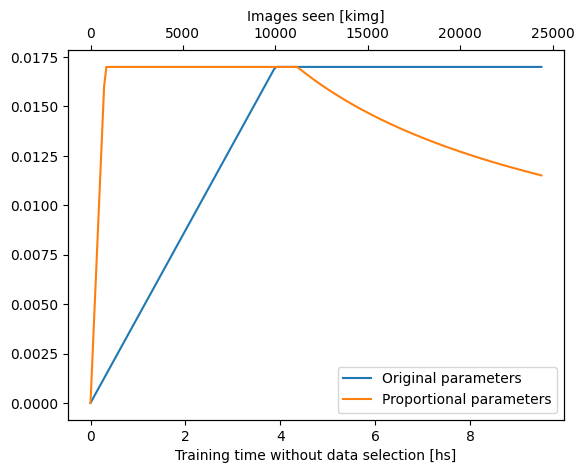

In [5]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plt.plot(cur_nimg/1e3, lr_original_params, label="Original parameters", linewidth=1.5)
plt.plot(cur_nimg/1e3, lr_adapted_params, label="Proportional parameters")
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()
ax.set_xlim(np.array(ax2.get_xlim())*1e3*2.87/60/60/2048)
ax.set_xlabel("Training time without data selection [hs]")

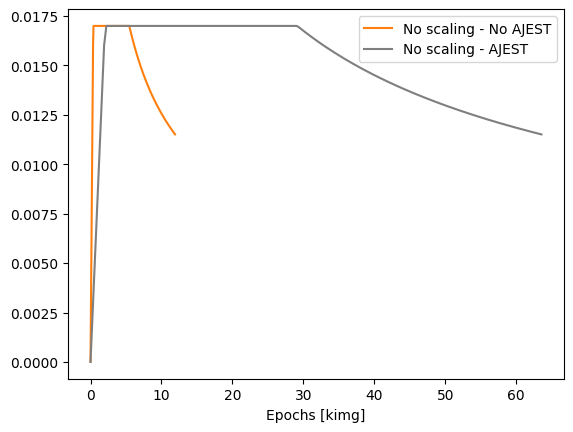

In [6]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/1e3/super_batch_size, lr_adapted_params, color="C1", label="No scaling - No AJEST")
plt.plot(cur_nimg/1e3/mini_batch_size, lr_adapted_params, color="C7", label="No scaling - AJEST")
plt.xlabel("Epochs [kimg]")
plt.legend()

In [ ]:
lr_proportional_params = np.array([learning_rate_schedule(nimg, super_batch_size, 0.0170,
                                    ref_batches=img_to_tiny(70e3*2048)/super_batch_size,
                                    rampup_Mimg=img_to_tiny(10e6)/1e6) for nimg in cur_nimg]) # == lr_adapted_params
lr_proportional_params_ajest = np.array([learning_rate_schedule(nimg, mini_batch_size, 0.0170,
                                    ref_batches=img_to_tiny(70e3*2048)/super_batch_size,
                                    rampup_Mimg=img_to_tiny(10e6)/1e6,
                                    super_batch_size=super_batch_size) for nimg in cur_nimg])


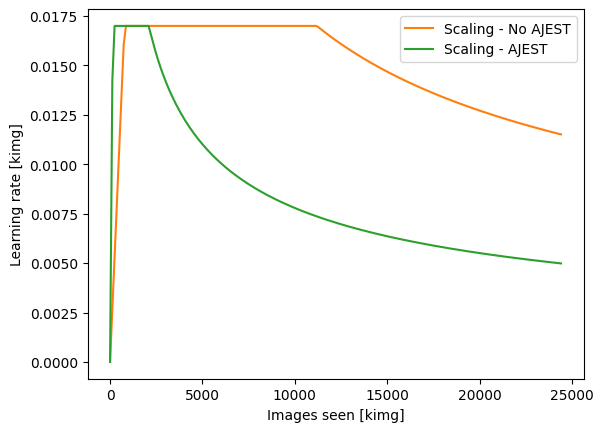

In [8]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/1e3, lr_proportional_params, color="C1", label="Scaling - No AJEST")
plt.plot(cur_nimg/1e3, lr_proportional_params_ajest, color="C2", label="Scaling - AJEST")
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()

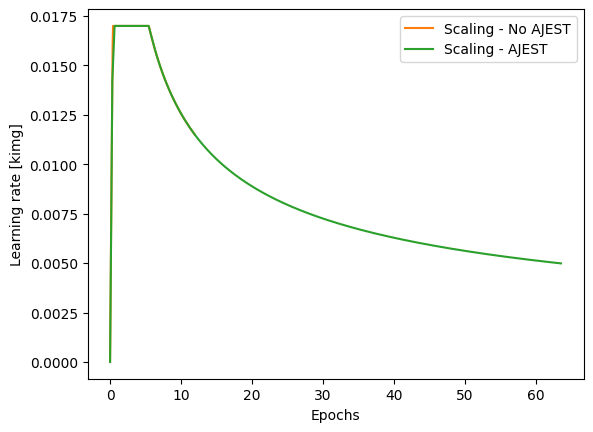

In [15]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/1e3/super_batch_size, lr_proportional_params, color="C1", label="Scaling - No AJEST")
plt.plot(cur_nimg/1e3/mini_batch_size, lr_proportional_params_ajest, color="C2", label="Scaling - AJEST")
plt.xlabel("Epochs")
plt.ylabel("Learning rate [kimg]")
plt.legend()
# plt.xlim((0,10))

In [64]:
batch_size = np.array([*[mini_batch_size]*100,*[super_batch_size]*100])
lr_early_ajest = np.array([learning_rate_schedule(nimg, bs, 0.0170,
                                    ref_batches=img_to_tiny(70e3*2048)/2048,
                                    rampup_Mimg=img_to_tiny(10e6)/1e6,
                                    super_batch_size=2048) for nimg, bs in zip(cur_nimg, batch_size)])
lr_late_ajest = np.array([learning_rate_schedule(nimg, bs, 0.0170,
                                    ref_batches=img_to_tiny(70e3*2048)/2048,
                                    rampup_Mimg=img_to_tiny(10e6)/1e6,
                                    super_batch_size=2048) for nimg, bs in zip(cur_nimg, batch_size[::-1])])

In [ ]:
img_to_tiny(10e6)/1e6

5463.0

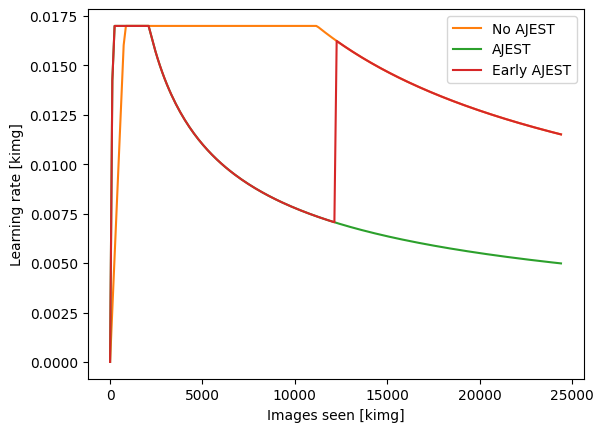

In [ ]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/1e3, lr_proportional_params, color="C1", label="No AJEST")
plt.plot(cur_nimg/1e3, lr_proportional_params_ajest, color="C2", label="AJEST")
plt.plot(cur_nimg/1e3, lr_early_ajest, color="C3", label="Early AJEST")
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()

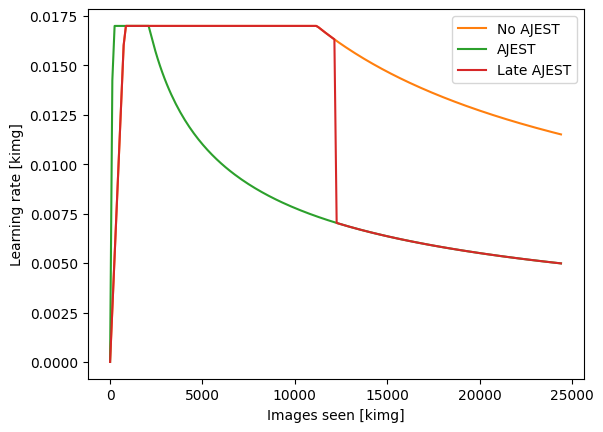

In [65]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/1e3, lr_proportional_params, color="C1", label="No AJEST")
plt.plot(cur_nimg/1e3, lr_proportional_params_ajest, color="C2", label="AJEST")
plt.plot(cur_nimg/1e3, lr_late_ajest, color="C3", label="Late AJEST")
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()

In [45]:
batch_size = np.array([*[mini_batch_size]*100,*[super_batch_size]*100])

prev_bs = batch_size[0]
diff_lr = 0
lr_early_ajest = []
for nimg, bs in zip(cur_nimg, batch_size):
    if bs != prev_bs:
        lr = learning_rate_schedule(nimg, bs, 0.0170,
                                    ref_batches=img_to_tiny(70e3*2048)/super_batch_size,
                                    rampup_Mimg=img_to_tiny(10e6)/1e6,
                                    super_batch_size=super_batch_size)
        diff_lr = lr - lr_early_ajest[-1]
    lr = learning_rate_schedule(nimg, bs, 0.0170,
                                ref_batches=img_to_tiny(70e3*2048)/super_batch_size,
                                rampup_Mimg=img_to_tiny(10e6)/1e6,
                                super_batch_size=super_batch_size, diff_lr=diff_lr)
    lr_early_ajest.append(lr)
    prev_bs = bs

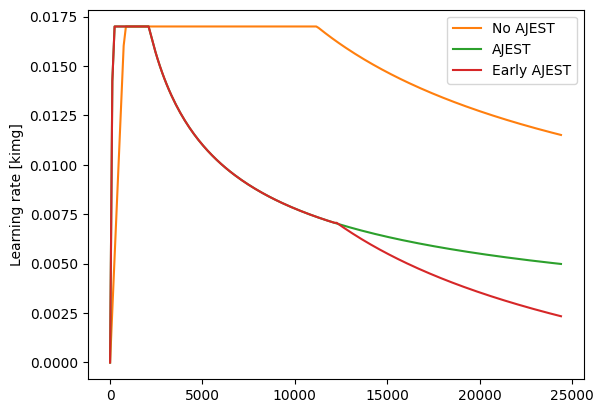

In [48]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/1e3, lr_proportional_params, color="C1", label="No AJEST")
plt.plot(cur_nimg/1e3, lr_proportional_params_ajest, color="C2", label="AJEST")
plt.plot(cur_nimg/1e3, lr_early_ajest, color="C3", label="Early AJEST")
plt.ylabel("Learning rate [kimg]")
plt.legend()

In [61]:
batch_size = np.array([*[mini_batch_size]*100,*[super_batch_size]*100])
curr_nimg_bs = np.array([*[mini_batch_size]*100,
                         *[super_batch_size]*100])

prev_bs = batch_size[0]
diff_nimg = 0
lr_early_ajest = []
for batch_i, (nimg, bs) in enumerate(zip(cur_nimg, batch_size)):
    if bs != prev_bs:
        diff_nimg = (super_batch_size-mini_batch_size)*batch_i
        batch_s = batch_i
    lr = learning_rate_schedule(nimg, bs, 0.0170,
                                ref_batches=img_to_tiny(70e3*super_batch_size)/super_batch_size,
                                rampup_Mimg=img_to_tiny(10e6)/1e6,
                                super_batch_size=super_batch_size, diff_nimg=diff_nimg)
    lr_early_ajest.append(lr)
    prev_bs = bs

In [59]:
diff_nimg

166400

In [62]:
batch_s

100

Text(0.5, 0, 'Training time without data selection [hs]')

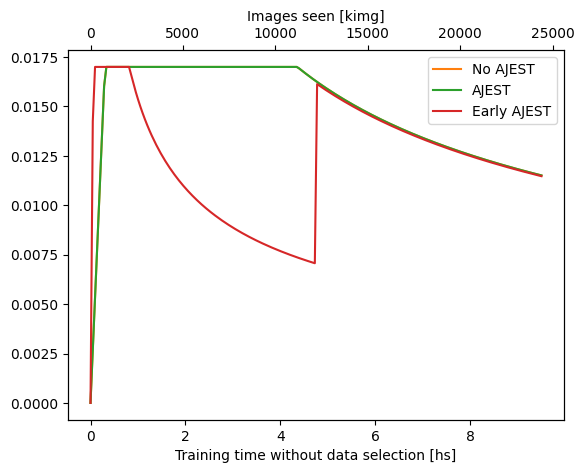

In [60]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plt.plot(cur_nimg/1e3, lr_adapted_params, color="C1", label="No AJEST")
plt.plot(cur_nimg/1e3, lr_proportional_params, color="C2", label="AJEST")
plt.plot(cur_nimg/1e3, lr_early_ajest, color="C3", label="Early AJEST")
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()
ax.set_xlim(np.array(ax2.get_xlim())*1e3*2.87/60/60/2048)
ax.set_xlabel("Training time without data selection [hs]")

In [130]:
lr_no_ajest = np.array([learning_rate_schedule(nimg, super_batch_size, 0.0170,
                                    ref_batches=img_to_tiny(70e3*2048)/super_batch_size,
                                    rampup_Mimg=img_to_tiny(10e6)/1e6) for nimg in cur_nimg]) # == lr_adapted_params
lr_ajest = np.array([learning_rate_schedule(nimg, mini_batch_size, 0.0170,
                                    ref_batches=img_to_tiny(70e3*2048)/super_batch_size,
                                    rampup_Mimg=img_to_tiny(10e6)/1e6,
                                    super_batch_size=super_batch_size) for nimg in cur_nimg])


Text(0.5, 0, 'Training time without data selection [hs]')

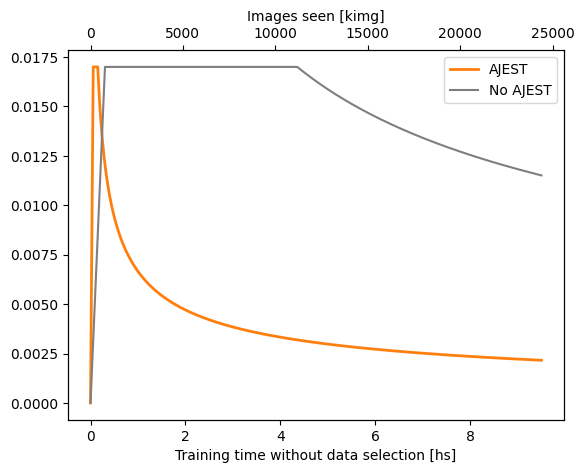

In [131]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plt.plot(cur_nimg/1e3, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/1e3, lr_no_ajest, color="C7", label="No AJEST", linewidth=1.5)
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()
ax.set_xlim(np.array(ax2.get_xlim())*1e3*2.87/60/60/2048)
ax.set_xlabel("Training time without data selection [hs]")

(0.0, 10000.0)

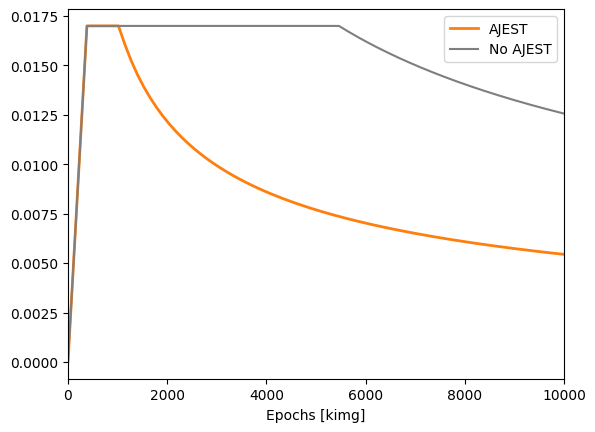

In [132]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/mini_batch_size, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/super_batch_size, lr_no_ajest, color="C7", label="No AJEST")
plt.xlabel("Epochs [kimg]")
plt.legend()
plt.xlim((0,10e3))

### Option

n_batches = (cur_nimg - diff_nimg) / batch_size

rampup_batches = rampup_Mimg * 1e6 / batch_size # for given batch size

ref_batches = ref_batches

Text(0.5, 0, 'Training time without data selection [hs]')

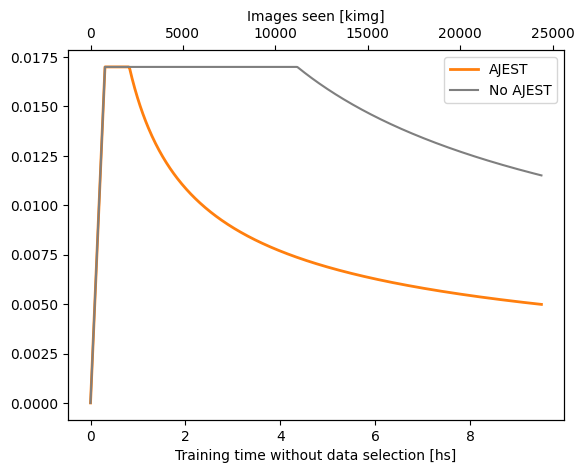

In [111]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plt.plot(cur_nimg/1e3, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/1e3, lr_no_ajest, color="C7", label="No AJEST", linewidth=1.5)
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()
ax.set_xlim(np.array(ax2.get_xlim())*1e3*2.87/60/60/2048)
ax.set_xlabel("Training time without data selection [hs]")

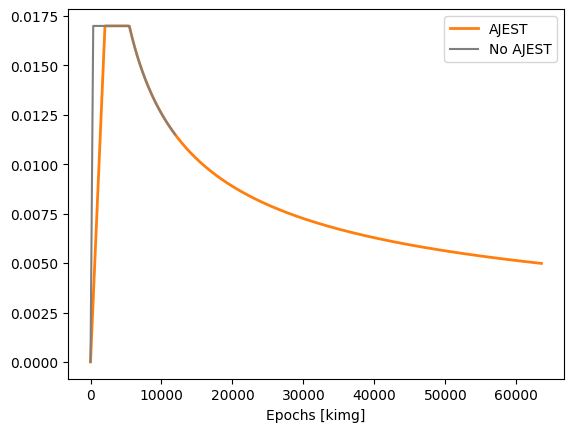

In [113]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/mini_batch_size, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/super_batch_size, lr_no_ajest, color="C7", label="No AJEST")
plt.xlabel("Epochs [kimg]")
plt.legend()
# plt.xlim((0,10e3))

(0.0, 10000.0)

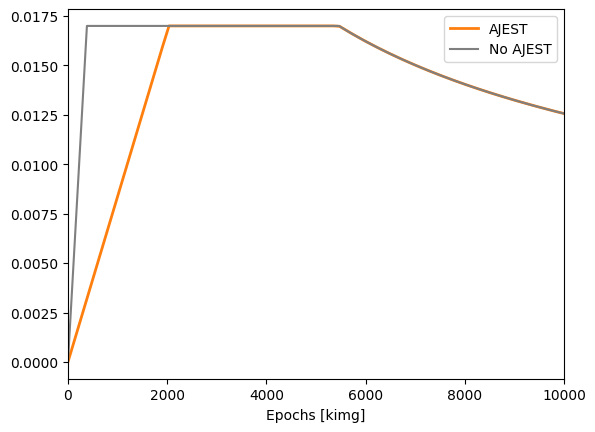

In [108]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/mini_batch_size, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/super_batch_size, lr_no_ajest, color="C7", label="No AJEST")
plt.xlabel("Epochs [kimg]")
plt.legend()
plt.xlim((0,10e3))

### Option

n_batches = (cur_nimg - diff_nimg) * super_batch_size**2 / (batch_size**3)

rampup_batches = rampup_Mimg * 1e6 / batch_size # for given batch size

ref_batches = ref_batches * batch_size # for given batch size

Text(0.5, 0, 'Training time without data selection [hs]')

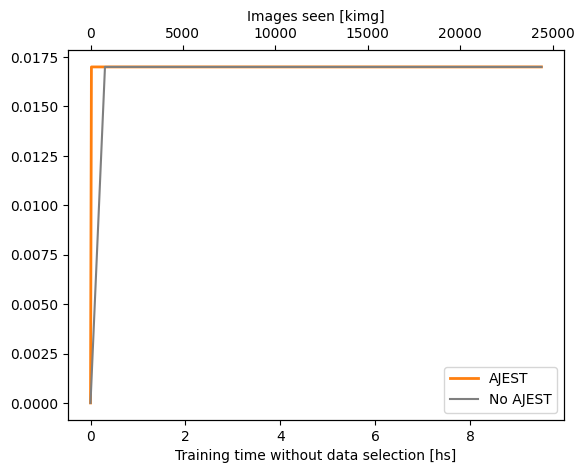

In [104]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plt.plot(cur_nimg/1e3, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/1e3, lr_no_ajest, color="C7", label="No AJEST", linewidth=1.5)
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()
ax.set_xlim(np.array(ax2.get_xlim())*1e3*2.87/60/60/2048)
ax.set_xlabel("Training time without data selection [hs]")

(0.0, 10000.0)

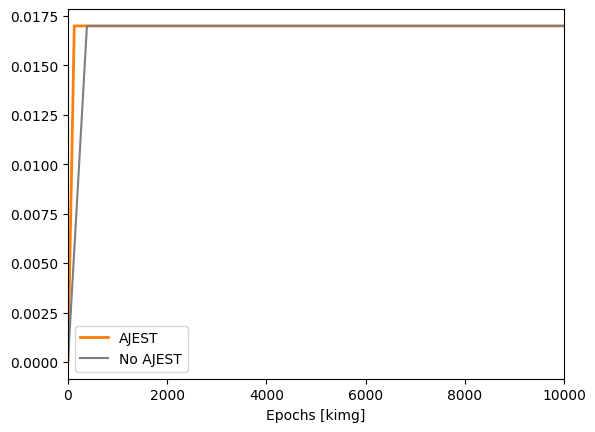

In [105]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/mini_batch_size, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/super_batch_size, lr_no_ajest, color="C7", label="No AJEST")
plt.xlabel("Epochs [kimg]")
plt.legend()
plt.xlim((0,10e3))

### Option

n_batches = (cur_nimg - diff_nimg) * super_batch_size**2 / (batch_size**3)

rampup_batches = rampup_Mimg * 1e6 / super_batch_size # for given batch size

ref_batches = ref_batches * batch_size / super_batch_size # for given batch size

Text(0.5, 0, 'Training time without data selection [hs]')

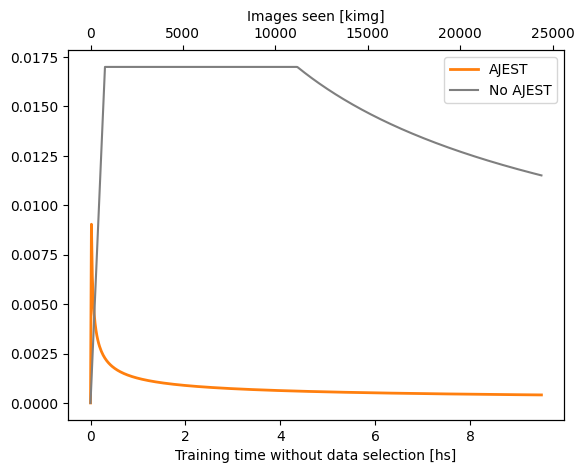

In [89]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plt.plot(cur_nimg/1e3, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/1e3, lr_no_ajest, color="C7", label="No AJEST", linewidth=1.5)
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()
ax.set_xlim(np.array(ax2.get_xlim())*1e3*2.87/60/60/2048)
ax.set_xlabel("Training time without data selection [hs]")

Text(0.5, 0, 'Training time without data selection [hs]')

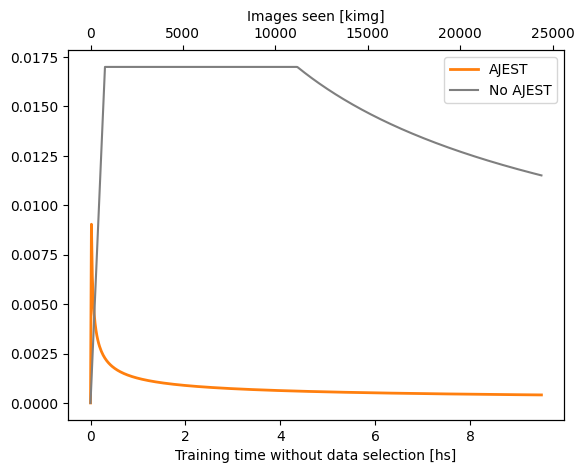

In [90]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plt.plot(cur_nimg/1e3, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/1e3, lr_no_ajest, color="C7", label="No AJEST", linewidth=1.5)
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()
ax.set_xlim(np.array(ax2.get_xlim())*1e3*2.87/60/60/2048)
ax.set_xlabel("Training time without data selection [hs]")

(0.0, 10000.0)

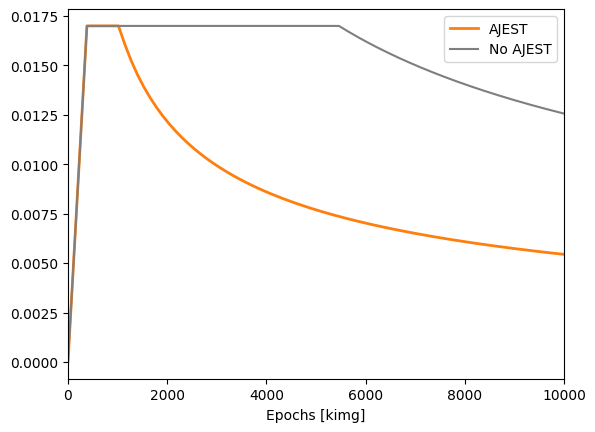

In [78]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/mini_batch_size, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/super_batch_size, lr_no_ajest, color="C7", label="No AJEST")
plt.xlabel("Epochs [kimg]")
plt.legend()
plt.xlim((0,10e3))

### Option

n_batches = (cur_nimg - diff_nimg) * super_batch_size**2 / (batch_size**3)

rampup_batches = rampup_Mimg * 1e6 / batch_size # for given batch size

ref_batches = ref_batches * super_batch_size / batch_size # for given batch size

Text(0.5, 0, 'Training time without data selection [hs]')

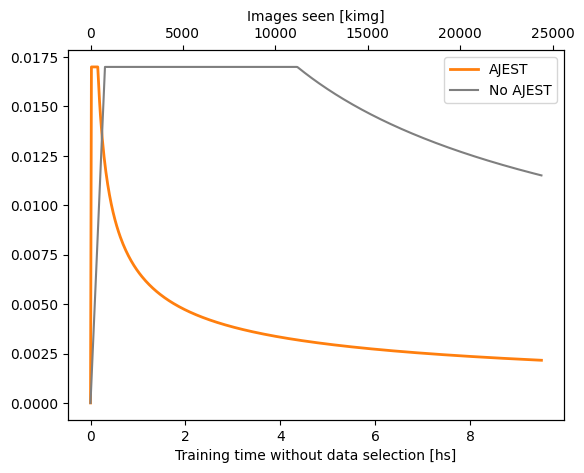

In [92]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plt.plot(cur_nimg/1e3, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/1e3, lr_no_ajest, color="C7", label="No AJEST", linewidth=1.5)
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()
ax.set_xlim(np.array(ax2.get_xlim())*1e3*2.87/60/60/2048)
ax.set_xlabel("Training time without data selection [hs]")

(0.0, 10000.0)

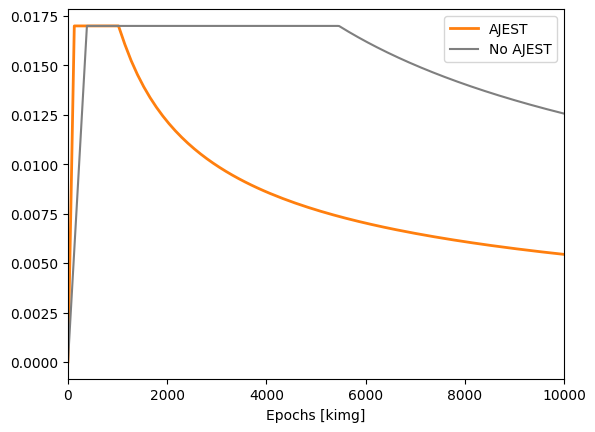

In [93]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/mini_batch_size, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/super_batch_size, lr_no_ajest, color="C7", label="No AJEST")
plt.xlabel("Epochs [kimg]")
plt.legend()
plt.xlim((0,10e3))

### Option

n_batches = (cur_nimg - diff_nimg) * super_batch_size / (batch_size**2)

rampup_batches = rampup_Mimg * 1e6 / batch_size # for given batch size

ref_batches = ref_batches * super_batch_size / batch_size # for given batch size

Text(0.5, 0, 'Training time without data selection [hs]')

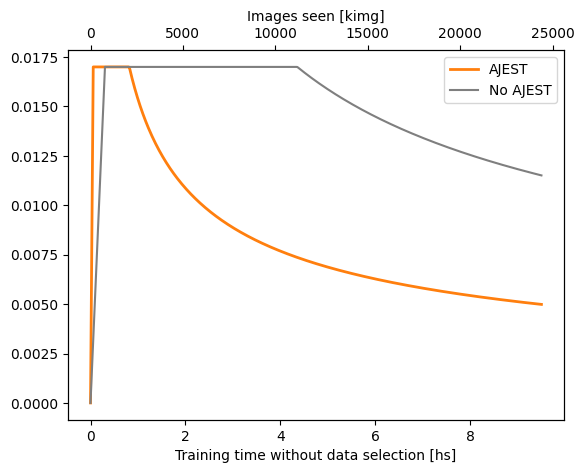

In [71]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plt.plot(cur_nimg/1e3, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/1e3, lr_no_ajest, color="C7", label="No AJEST", linewidth=1.5)
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()
ax.set_xlim(np.array(ax2.get_xlim())*1e3*2.87/60/60/2048)
ax.set_xlabel("Training time without data selection [hs]")

(0.0, 10000.0)

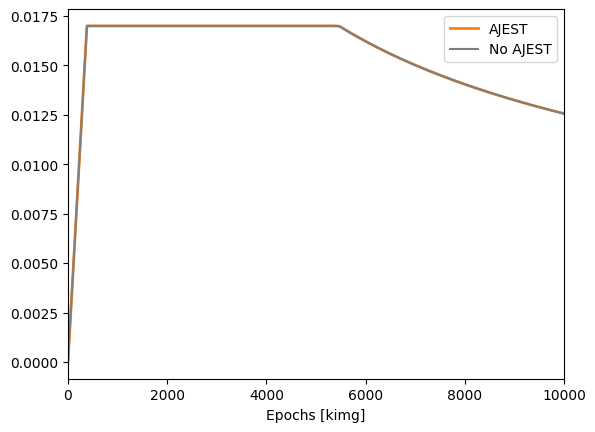

In [72]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/mini_batch_size, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/super_batch_size, lr_no_ajest, color="C7", label="No AJEST")
plt.xlabel("Epochs [kimg]")
plt.legend()
plt.xlim((0,10e3))

### Option

n_batches = (cur_nimg - diff_nimg) / batch_size

rampup_batches = rampup_Mimg * 1e6 / batch_size # for given batch size

ref_batches = ref_batches * super_batch_size / batch_size # for given batch size

Text(0.5, 0, 'Training time without data selection [hs]')

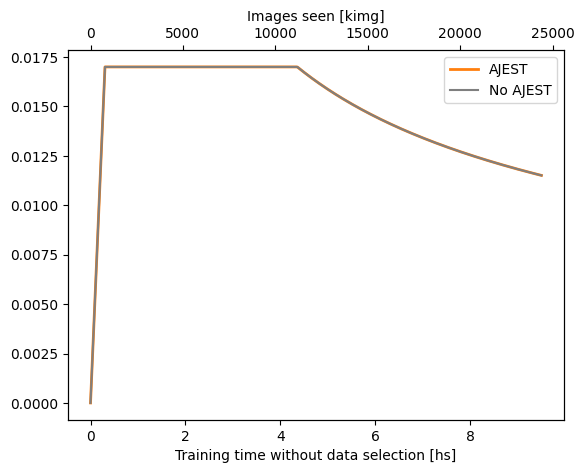

In [61]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plt.plot(cur_nimg/1e3, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/1e3, lr_no_ajest, color="C7", label="No AJEST", linewidth=1.5)
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()
ax.set_xlim(np.array(ax2.get_xlim())*1e3*2.87/60/60/2048)
ax.set_xlabel("Training time without data selection [hs]")

(0.0, 10000.0)

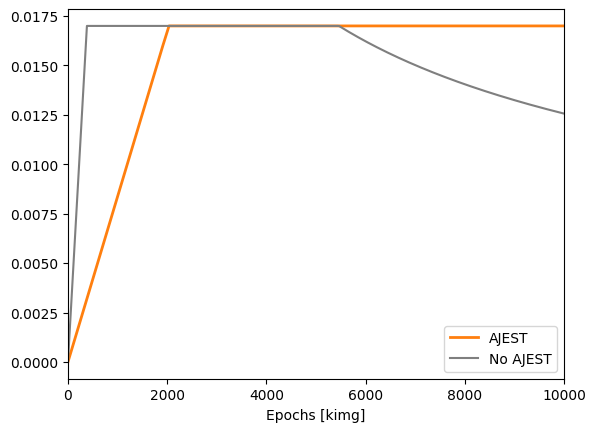

In [62]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/mini_batch_size, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/super_batch_size, lr_no_ajest, color="C7", label="No AJEST")
plt.xlabel("Epochs [kimg]")
plt.legend()
plt.xlim((0,10e3))

### Option

n_batches = (cur_nimg - diff_nimg) * super_batch_size / (batch_size**2)

rampup_batches = rampup_Mimg * 1e6 * super_batch_size / (batch_size**2) # for given batch size, further adjusted

ref_batches = ref_batches * super_batch_size / batch_size # for given batch size

Text(0.5, 0, 'Training time without data selection [hs]')

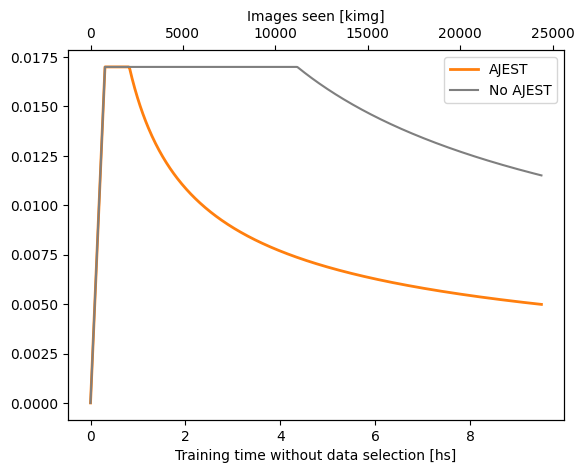

In [68]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plt.plot(cur_nimg/1e3, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/1e3, lr_no_ajest, color="C7", label="No AJEST", linewidth=1.5)
plt.xlabel("Images seen [kimg]")
plt.ylabel("Learning rate [kimg]")
plt.legend()
ax.set_xlim(np.array(ax2.get_xlim())*1e3*2.87/60/60/2048)
ax.set_xlabel("Training time without data selection [hs]")

(0.0, 10000.0)

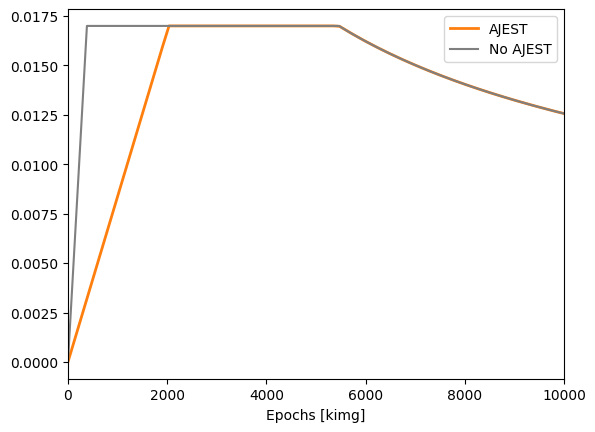

In [69]:
fig, ax = plt.subplots()
plt.plot(cur_nimg/mini_batch_size, lr_ajest, color="C1", label="AJEST", linewidth=2)
plt.plot(cur_nimg/super_batch_size, lr_no_ajest, color="C7", label="No AJEST")
plt.xlabel("Epochs [kimg]")
plt.legend()
plt.xlim((0,10e3))